In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data

data = np.loadtxt('data_train.txt', skiprows=1)

In [3]:
x_train = data[:,range(1,1001)]
y_train = data[:,0]

In [ ]:
# Load words

import numpy as np
import csv

# Import data and labels
training_data = np.loadtxt('data/training_data.txt', skiprows=1)
with open('data/training_data.txt') as f:
    reader = csv.reader(f, delimiter=" ")
    labels = next(reader)

In [48]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# Test Normalization

from sklearn import preprocessing

# KFold cross validation

# from sklearn.model_selection import KFold
    
# kf = KFold(n_splits = 5, shuffle=True)
# inds = [ind for ind in kf.split(x_train, y_train)]

# for fold in range(5):
#     x_train_folds = x_train[inds[fold][0]]
#     x_val_folds = x_train[inds[fold][1]]
#     y_train_folds = y_train[inds[fold][0]]
#     y_val_folds = y_train[inds[fold][1]]
    
# print(len(x_train_folds))

# Split the data

from sklearn.model_selection import train_test_split

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# w/o normalization

# l1 regularization

model = LogisticRegression(penalty='l1')
model.fit(x_train_s, y_train_s)

print(model.score(x_val, y_val))

# l2 regularization

model = LogisticRegression(penalty='l1')
model.fit(x_train_s, y_train_s)

print(model.score(x_val, y_val))

# w/ normalization

x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

# l1 regularization

model = LogisticRegression(penalty='l1')
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm, y_val))

# l2 regularization

model = LogisticRegression(penalty='l2')
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm, y_val))

# Recoded data: 0 and 1 to -1 and 1

y_train_neg1 = y_train
y_train_neg1[y_train == 0] = -1

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train_neg1, test_size=0.2, random_state=42)

x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

# Best model

model = LogisticRegression(penalty='l1')
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm, y_val))

0.84725
0.84725
0.84775
0.84675
0.84775


In [90]:
# Optimize regularization parameter Logistic Regression of best model 
# (l1-regularized, normalized data)

cs = []
ci = 0.00001
for i in range(18):
    ci = 5*ci
    cs.append(ci)
    
x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

opt_c = []
for ci in cs:
    model = LogisticRegression(penalty='l1', C=ci)
    model.fit(x_train_s_norm, y_train_s)
    opt_c.append(model.score(x_val_norm, y_val))

In [91]:
np.argmax(opt_c), opt_c[7], cs[7]

(7, 0.84950000000000003, 3.90625)

In [96]:
# Optimize regularization parameter Logistic Regression of best model 
# (l1-regularized, non normalized data)

cs = []
ci = 0.00001
for i in range(18):
    ci = 5*ci
    cs.append(ci)
    
x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

opt_c = []
for ci in cs:
    model = LogisticRegression(penalty='l1', C=ci)
    model.fit(x_train_s, y_train_s)
    opt_c.append(model.score(x_val, y_val))

In [4]:
# Predict on test set

data_train = np.loadtxt('training_data.txt', skiprows=1)
data_test = np.loadtxt('test_data.txt', skiprows=1)

In [5]:
x_train = data_train[:,range(1,1001)]
y_train = data_train[:,0]

x_test = data_test

In [133]:
# Best Logistic Regression Model

# Normalize data
x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

model = LogisticRegression(penalty='l1', C=3.90625)
model.fit(x_train_norm, y_train)

y_pred = model.predict(x_test)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_Logistic_Regression.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [264]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=3.1, penalty='l1')
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm, y_val))

0.8471875


In [265]:
# Trying different C 

# Best Logistic Regression Model

# Normalize data
x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

model = LogisticRegression(penalty='l1', C=3.1)
model.fit(x_train_norm, y_train)

y_pred = model.predict(x_test)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_Logistic_Regression2.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [220]:
# SVC

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Normalize data

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

clf = svm.SVC()
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

0.503125


In [221]:
# Optimizing

cs = []
ci = 0.00001
for i in range(18):
    ci = 5*ci
    cs.append(ci)

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

opt_c = []
for ci in cs:
    clf = svm.SVC(C=ci)
    clf.fit(x_train_s_norm, y_train_s)
    opt_c.append(clf.score(x_val_norm, y_val))

NameError: name 'cs' is not defined

In [ ]:
np.argmax(opt_c), opt_c[7], cs[7]

In [223]:
# Linear SVM, l1 reg

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

clf = svm.LinearSVC(penalty='l1', loss='squared_hinge', dual=False)
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

0.84875


In [268]:
x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

clf = svm.LinearSVC(C=0.77, penalty='l1', loss='squared_hinge', dual=False)
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

0.8485


In [ ]:
# Trying different C 

# Best SVC

# Normalize data
x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

clf = svm.LinearSVC(C=0.77, penalty='l1', loss='squared_hinge', dual=False)
clf.fit(x_train_s_norm, y_train_s)

y_pred = clf.predict(x_test)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_LinearSVC.csv', index=False, header=True)

In [225]:
# Optimizing

cs = []
ci = 0.00001
for i in range(18):
    ci = 5*ci
    cs.append(ci)

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

opt_c = []
for ci in cs:
    clf = svm.LinearSVC(C=ci, penalty='l1', loss='squared_hinge', dual=False)
    clf.fit(x_train_s_norm, y_train_s)
    opt_c.append(clf.score(x_val_norm, y_val))

In [236]:
opt_c

[0.49687500000000001,
 0.49687500000000001,
 0.49687500000000001,
 0.67500000000000004,
 0.79843750000000002,
 0.84593750000000001,
 0.84968750000000004,
 0.84406250000000005,
 0.84406250000000005,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375]

In [226]:
np.argmax(opt_c)

(6, 0.84406250000000005, 3.90625)

In [269]:
# SVC, rbf kernel

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

clf = svm.SVC(C=1, kernel='rbf')
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

0.497


In [ ]:
# Optimizing

cs = []
ci = 0.00001
for i in range(18):
    ci = 5*ci
    cs.append(ci)

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

opt_c = []
for ci in cs:
    clf = svm.SVC(C=ci, kernel='rbf')
    clf.fit(x_train_s_norm, y_train_s)
    opt_c.append(clf.score(x_val_norm, y_val))

In [270]:
# SVC, linear kernel

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

clf = svm.SVC(C=1, kernel='linear')
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

0.85125


In [6]:
# Optimizing

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

cs = []
ci = 0.01
for i in range(4):
    ci = 5*ci
    cs.append(ci)

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

opt_c = []
for ci in cs:
    clf = svm.SVC(C=ci, kernel='linear')
    clf.fit(x_train_s_norm, y_train_s)
    opt_c.append(clf.score(x_val_norm, y_val))

In [10]:
np.argmax(opt_c), opt_c[2], cs[2], opt_c

(2,
 0.84799999999999998,
 1.25,
 [0.82874999999999999,
  0.84724999999999995,
  0.84799999999999998,
  0.84350000000000003])

In [12]:
# Optimal  SVC, linear kernel, C=1

# Normalize data
x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

clf = svm.SVC(C=1, kernel='linear')
clf.fit(x_train_norm, y_train)

y_pred = clf.predict(x_test_norm)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_LinearSVC.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [ ]:
# Optimizing

cs = []
ci = 0.00001
for i in range(18):
    ci = 5*ci
    cs.append(ci)

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

opt_c = []
for ci in cs:
    clf = svm.SVC(C=ci, kernel='linear')
    clf.fit(x_train_s_norm, y_train_s)
    opt_c.append(clf.score(x_val_norm, y_val))

In [15]:
# Random Forest

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Normalize data

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

# Base (1000 Classifiers)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

0.8334375


In [17]:
def classification_err(y, real_y):
    
    return (len(y) - np.sum(np.equal(y, real_y)))/(len(y))
    
    pass

def eval_tree_based_model_min_samples(clf, min_samples_leaf, X_train, y_train, X_test, y_test):
    
    train_err = []
    test_err = []
    for i in min_samples_leaf:
        clf = clf
        clf.min_samples_leaf = i
        clf.fit(X_train, y_train)
        train_err.append(classification_err(clf.predict(X_train), y_train))
        test_err.append(classification_err(clf.predict(X_test), y_test))
    
    return train_err, test_err
    pass

In [27]:
def eval_tree_based_model_max_depth(clf, max_depth, X_train, y_train, X_test, y_test):

    train_err = []
    test_err = []
    for i in max_depth:
        clf = clf
        clf.max_depth = i
        clf.fit(X_train, y_train)
        train_err.append(classification_err(clf.predict(X_train), y_train))
        test_err.append(classification_err(clf.predict(X_test), y_test))
    
    return train_err, test_err
    pass

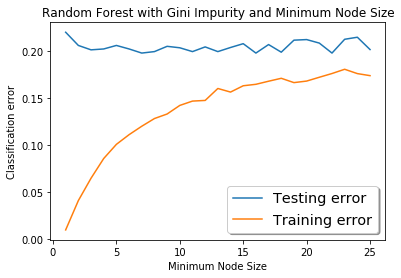

Test error minimized at min_samples_leaf = 7


In [36]:
# Normalize data

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')


n_estimators = 10
clf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini')

min_samples_leaf = np.arange(1, 26)

train_err, test_err = eval_tree_based_model_min_samples(clf, min_samples_leaf, x_train_s_norm, 
                                                        y_train_s, x_val_norm, y_val)

plt.figure()
plt.plot(min_samples_leaf, test_err, label='Testing error')
plt.plot(min_samples_leaf, train_err, label='Training error')
plt.xlabel('Minimum Node Size')
plt.ylabel('Classification error')
plt.title('Random Forest with Gini Impurity and Minimum Node Size')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.savefig("2D")
plt.show()

print('Test error minimized at min_samples_leaf = %i' % min_samples_leaf[np.argmin(test_err)])

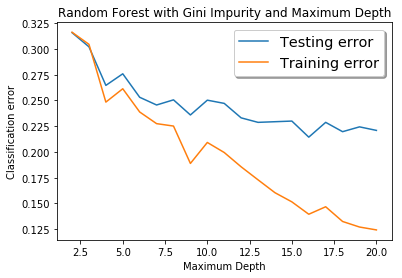

Test error minimized at max_depth = 16


In [37]:
clf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini')

max_depth = np.arange(2, 21)

train_err, test_err = eval_tree_based_model_max_depth(clf, max_depth, x_train_s_norm, 
                                                        y_train_s, x_val_norm, y_val)

plt.figure()
plt.plot(max_depth, test_err, label='Testing error')
plt.plot(max_depth, train_err, label='Training error')
plt.xlabel('Maximum Depth')
plt.ylabel('Classification error')
plt.title('Random Forest with Gini Impurity and Maximum Depth')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.savefig('2E')
plt.show()

print('Test error minimized at max_depth = %i' % max_depth[np.argmin(test_err)])

In [33]:
# Try optimal Random Forest

# Normalize data

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

# Base (1000 Classifiers)

# clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=7, max_depth=30)
clf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=7, max_depth=30)
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

0.825625


In [13]:
# Grid Search

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# Normalize data

x_train_norm = preprocessing.normalize(x_train, norm='l2')

# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(x_train_norm, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(x_train_norm, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 27.71 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.814 (std: 0.005)
Parameters: {'max_features': 9, 'min_samples_leaf': 8, 'bootstrap': False, 'min_samples_split': 4, 'criterion': 'gini', 'max_depth': None}

Model with rank: 2
Mean validation score: 0.811 (std: 0.002)
Parameters: {'max_features': 5, 'min_samples_leaf': 3, 'bootstrap': True, 'min_samples_split': 5, 'criterion': 'entropy', 'max_depth': None}

Model with rank: 3
Mean validation score: 0.807 (std: 0.002)
Parameters: {'max_features': 4, 'min_samples_leaf': 7, 'bootstrap': True, 'min_samples_split': 4, 'criterion': 'entropy', 'max_depth': None}



KeyboardInterrupt: 

In [39]:
# Naive Bayes
# Find most informative features

import nltk 

# normalize data

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

# Base (1000 Classifiers)

# clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=7, max_depth=30)
clf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=7, max_depth=30)
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

In [43]:
# Load words

In [70]:
bag_of_words = []
with open('data_train.txt','r') as f:
    for line in f:
        for word in line.split():
             bag_of_words.append(word)
                
bag_of_words = bag_of_words[:1000]

In [72]:
bag_of_words[:10]

['Label', 'thi', 'book', 'wa', 'one', 'read', 'movi', 'like', 'great', 'good']

In [79]:
x_train[0][:10], y_train[0]

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 1.0)

In [209]:
sent = []
for i in range(len(x_train)):
    for w in range(len(bag_of_words)):
        if x_train[i][w] == 0:
            sent.append(({bag_of_words[w]: False}, y_train[i]))
        elif x_train[i][w] == 1:
            sent.append(({bag_of_words[w]: True}, y_train[i]))

# [({'this': True, 'love': True, 'view': False}, 'pos'), . . .]

In [213]:
sent[:10]

[({'Label': False}, 1.0),
 ({'thi': False}, 1.0),
 ({'book': False}, 1.0),
 ({'wa': False}, 1.0),
 ({'one': False}, 1.0),
 ({'read': False}, 1.0),
 ({'movi': False}, 1.0),
 ({'like': False}, 1.0),
 ({'great': False}, 1.0),
 ({'good': False}, 1.0)]

In [214]:
classifier = nltk.NaiveBayesClassifier.train(sent)

In [216]:
#  Most informative words

classifier.show_most_informative_features(10)

Most Informative Features
                    loud = True              0.0 : 1.0    =     45.8 : 1.0
                    room = True              0.0 : 1.0    =     26.2 : 1.0
                    show = True              0.0 : 1.0    =     23.0 : 1.0
                    tool = True              0.0 : 1.0    =     13.9 : 1.0
                 impress = True              0.0 : 1.0    =     13.6 : 1.0
                    tell = True              0.0 : 1.0    =     13.0 : 1.0
                    area = True              1.0 : 0.0    =     12.1 : 1.0
                    emot = True              0.0 : 1.0    =     11.4 : 1.0
                  singer = True              0.0 : 1.0    =     11.2 : 1.0
                    fine = True              0.0 : 1.0    =      9.6 : 1.0


In [ ]:
sent_val = []
for i in range(len(x_val)):
    for w in range(len(bag_of_words)):
        if x_train[i][w] == 0:
            sent.append(({bag_of_words[w]: False}, y_train[i]))
        elif x_train[i][w] == 1:
            sent.append(({bag_of_words[w]: True}, y_train[i]))

In [219]:
nltk.classify.accuracy(classifier, sent)

0.50697712663941019